
#### Adidas operates a wide product portfolio across multiple retailers, sales channels (online and offline), and geographic regions in the United States. However, the company lacks a consolidated understanding of which products, regions, and channels are driving the most revenue and profit.
#### To make data-driven decisions on marketing, inventory management, and channel investment, Adidas needs a comprehensive analysis of sales performance across all dimensions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load CSV into Pandas

In [153]:
import pandas as pd
df = pd.read_csv(r"D:\Adidas US Sales.csv")

##### Convert CSV to SQLite database

In [155]:
import sqlite3 
conn = sqlite3.connect(r"D:\Adidas US Sales.db")
# Save the DataFrame as a table named 'sales'
df.to_sql("sales", conn, if_exists="replace", index=False)

9648

##### Run the SQL Queries to Find Insights

##### 1. Top 5 Best-Selling Products by Revenue
###### Which products drive the most revenue?

In [157]:
query1 = """
Select "product",
  SUM("Units Sold" * "price per Unit") AS Revenue 
FROM sales 
Group By "Product"
Order BY Revenue desc;
"""

In [159]:
df1 = pd.read_sql_query(query1,conn)
print((df1))

                     Product   Revenue
0      Men's Street Footwear  27680769
1            Women's Apparel  23870985
2    Men's Athletic Footwear  20577180
3    Women's Street Footwear  17201563
4              Men's Apparel  16520632
5  Women's Athletic Footwear  14315521


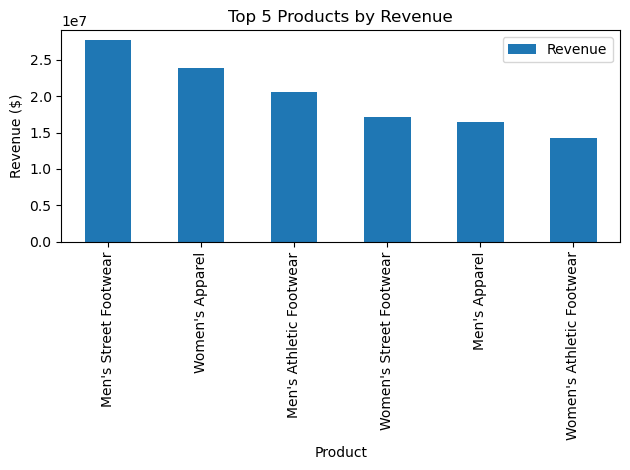

In [161]:
df1.plot(kind='bar', x='Product', y='Revenue', title='Top 5 Products by Revenue')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

#### 2. Regional Sales Performance
##### Which regions generate the most profit?

In [163]:
query2 = """
Select "Region",
sum("Total Profit") as Profit
from sales
group by "Region"
order by Profit desc;
"""

In [165]:
df2 = pd.read_sql_query(query2,conn)
print((df2))

      Region      Profit
0       West  96790926.7
1  Northeast  72092880.5
2  Southeast  64757420.0
3      South  64192557.3
4    Midwest  55519449.2


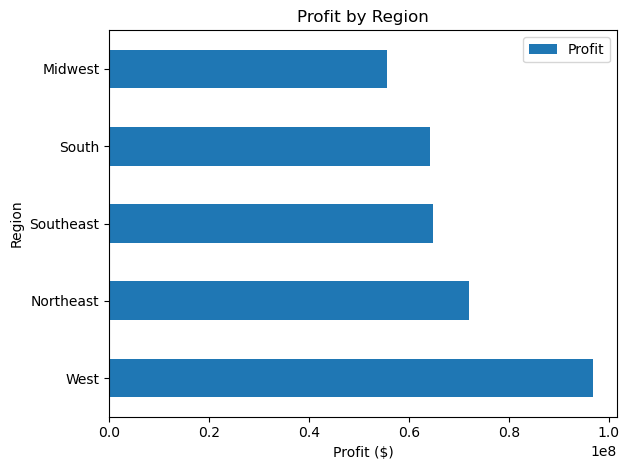

In [167]:
df2.plot(kind='barh', x='Region', y='Profit', title='Profit by Region')
plt.xlabel('Profit ($)')
plt.tight_layout()
plt.show()

#### 3. Retailer Comparison – Average Profit per Unit Sold
##### Which retailer gives the best profit per unit?


In [170]:
query3= """
SELECT "Retailer", 
       ROUND(SUM("Total Profit") / SUM("Units Sold"), 2) AS profit_per_unit 
FROM sales 
GROUP BY "Retailer"
ORDER BY profit_per_unit DESC;
"""


In [174]:
df3 = pd.read_sql_query(query3,conn)
print((df3))

        Retailer  profit_per_unit
0         Amazon           155.00
1      West Gear           145.83
2    Foot Locker           142.93
3  Sports Direct           140.03
4         Kohl's           137.51
5        Walmart           133.34


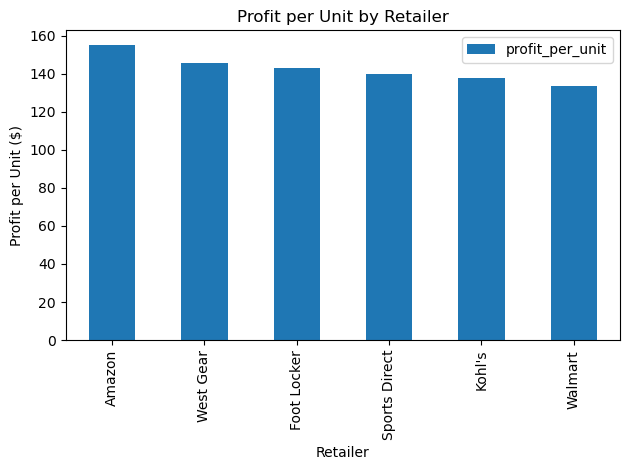

In [176]:
df3.plot(kind='bar', x='Retailer', y='profit_per_unit', title='Profit per Unit by Retailer')
plt.ylabel('Profit per Unit ($)')
plt.tight_layout()
plt.show()

#### 4.  Products with the Lowest Profit Margins
##### Which products are least profitable despite high sales?

In [204]:
query4 = """
SELECT "Product", 
SUM("Units Sold") AS units, 
SUM("Total Profit") AS profit,
ROUND(SUM("Total Profit") / SUM("Total Sales"), 4) AS profit_margin
FROM sales
GROUP BY "Product"
HAVING units > 500
ORDER BY profit_margin ASC
LIMIT 5;
"""

In [206]:
df4 = pd.read_sql_query(query4,conn)
print((df4))

                     Product   units      profit  profit_margin
0    Men's Athletic Footwear  435526  56263503.4         0.3661
1    Women's Street Footwear  392269  48614792.9         0.3798
2  Women's Athletic Footwear  317236  41182904.0         0.3862
3              Men's Apparel  306683  48166883.6         0.3893
4            Women's Apparel  433827  71790167.5         0.4010


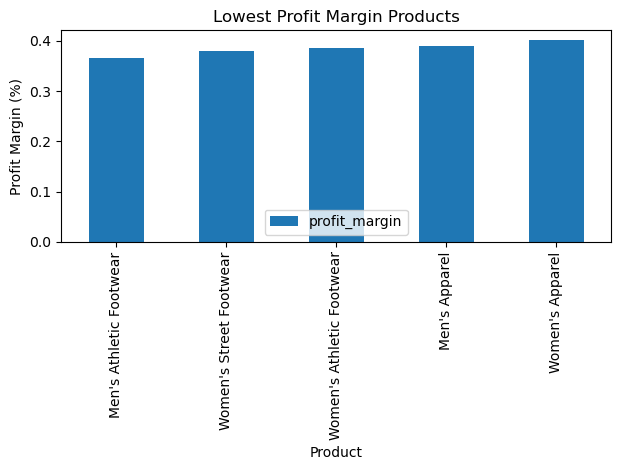

In [210]:
df4.plot(kind='bar', x='Product', y='profit_margin', title='Lowest Profit Margin Products')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()


#### 5. Sales Channel Performance – Online vs Offline
##### Which sales method (Online vs Offline) is more profitable?

In [219]:
query5 = """
SELECT "Sales Method",
SUM("Units Sold") AS total_units,
SUM("Total Sales") AS total_sales,
SUM("Total Profit") AS total_profit,
ROUND(SUM("Total Profit") / SUM("Total Sales"), 4) AS profit_margin
FROM sales
GROUP BY "Sales Method"
ORDER BY total_profit DESC;
"""


In [221]:
df5 = pd.read_sql_query(query5,conn)
print((df5))

  Sales Method  total_units  total_sales  total_profit  profit_margin
0     In-store       689990    356643750   135927075.0         0.3811
1       Outlet       849778    295585493   115387012.7         0.3904
2       Online       939093    247672882   102039146.0         0.4120


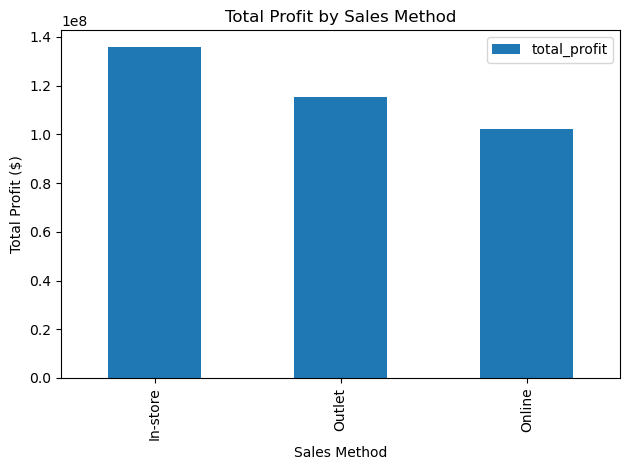

In [223]:
df5.plot(kind='bar', x='Sales Method', y='total_profit', title='Total Profit by Sales Method')
plt.ylabel('Total Profit ($)')
plt.tight_layout()
plt.show()


In [ ]:
### Adidas US Sales Analysis – Executive Summary

#### This dataset captures Adidas retail performance across U.S. regions, retailers, products, and time. Key columns include:

#### Product, Retailer, Region, Units Sold, Total Sales, Total Profit, Sales Method, Order Date.

Key Business Questions & Insights
1. Top 5 Best-Selling Products by Revenue
Query Goal: Identify products that generate the most revenue.

Insight:
High-revenue products like Men's Street Footwear and Men’s Athletic Footwear dominate sales.
Action: Focus marketing & inventory on these products.

2. Regional Sales Performance
Query Goal: Analyze profitability by region.

Insight:
Regions like the West and Central deliver the highest profits, while others lag.
Action: Shift resources to high-performing regions; improve strategy in weaker ones.

3. 🛍️ Retailer Comparison – Profit per Unit
Query Goal: Compare profitability across retailers.

Insight:
Some retailers offer higher profit per unit sold, indicating better margin deals or pricing.
Action: Strengthen partnerships with high-margin retailers.

4. 📆 Monthly Sales Trend
Query Goal: Identify revenue trends over time.

Insight:
Clear seasonality observed (e.g., Q4 spike), likely due to holiday sales.
Action: Prepare campaigns and stock ahead of peak months.

5. ⚠️ Lowest Margin Products
Query Goal: Detect products that sell well but earn little profit.

Insight:
Some apparel products have low margins despite high volume.
Action: Re-evaluate pricing or reduce cost to boost profitability.

6. 🧑‍💻 Sales Method Analysis – Online vs Offline
Query Goal: Evaluate performance of sales channels.

Insight:

Online tends to have a higher profit margin

Offline may drive more volume
Action: Optimize digital marketing for online; streamline costs in offline.

📈 Overall Strategic Takeaways
Double down on top-selling product categories and high-margin retailers.

Reallocate inventory based on regional profitability.

Use seasonal insights for marketing and supply chain alignment.

Boost online sales given stronger margins.

Reprice or phase out low-margin products that underperform on profit.

